<img src="IMG/logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales - Segundo Cuatrimestre 2025

# Trabajo Práctico Nº2: Sistemas lineales e invariantes en el tiempo
#### Matías Cassino

# Consignas

1) Dada la siguiente ecuación en diferencias que modela un sistema LTI:

\begin{equation}
y[n] = 3 \cdot 10^{-2} \, x[n] 
     + 5 \cdot 10^{-2} \, x[n-1] 
     + 3 \cdot 10^{-2} \, x[n-2] 
     + 1.5 \, y[n-1] 
     - 0.5 \, y[n-2]
\end{equation}

A) Graficar la señal de salida para cada una de las señales de entrada que generó en el TS1. Considere que las mismas son causales.

B) Hallar la respuesta al impulso y usando la misma, repetir la generación de la señal de salida para alguna de las señales de entrada consideradas en el punto anterior.

C) En cada caso indique la frecuencia de muestreo, el tiempo de simulación y la potencia o energía de la señal de salida.

2) Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:

I) \begin{equation} y[n]=x[n] + 3 \, x[n-10] \end{equation}

II) $$ y[n]=x[n] + 3 \, y[n-10] $$

Bonus

3) Discretizar la siguiente ecuación diferencial correspondiente al modelo de Windkessel que describe la dinámica presión-flujo del sistema sanguíneo:

$$ C \, \frac{dP}{dt}+\frac{1}{R} \, P(t)=Q(t)$$

Considere valores típicos de Compliance y Resistencia vascular.

# Introducción

Inicialmente, en este trabajo se aplicó la función 'lfilter' para obtener la salida de un sistema recursivo modelado por una ecuacion en diferencias ante la entrada de señales senoidales, moduladas, cuadradas y pulso. Además, se empleó la función convolve como alternativa con la cual se obtuvieron los mismos resultados. Posteriormente, se analizaron dos sistemas, uno recursivo y el otro no, con el propósito de obtener nuevamente la salida y la respuesta al impulso y contrastar sus consecuencias. Finalmente, se discretizó un modelo que define la relación presión-flujo del sistema circulatorio por medio del método de Euler a fin de representar su entrada y salida.

# Desarrollo experimental

In [1]:
#%% Modulos
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdsmodulos as pds
from scipy import signal

#%% Funciones
plt.close("all")

# Senoidal
def mi_funcion_sen(vmax, dc, ff, ph, N, fs, plot=True):
    
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    arg = 2*np.pi*ff*tt + ph # argumento
    xx = (vmax*(np.sin(arg)) + dc).flatten() # señal
    pot = (1/N)*np.sum(xx**2)
    
    if plot:
        
        #Presentación gráfica de los resultados
        plt.figure()
        plt.plot(tt, xx, label=f"f = {ff} Hz\nN = {N}\nTs = {ts} s\nPotencia = {pot:.3f} W")
        plt.title('Señal: senoidal')
        plt.xlabel('tiempo [s]')
        plt.ylabel('Amplitud [V]')
        plt.grid()
        plt.xlim([tt.min() - 0.1*(tt.max()-tt.min()), tt.max() + 0.1*(tt.max()-tt.min())])
        plt.ylim([xx.min() - 0.1*(xx.max()-xx.min()), xx.max() + 0.1*(xx.max()-xx.min())])
        plt.legend()
        plt.show() 
        
    return tt,xx

# Cuadrada
def funcion_cuadrada(vmax, dc, ff, ph, N, fs, plot=True):
    
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    arg = 2*np.pi*ff*tt + ph # argumento
    xx = (vmax*(signal.square(arg)) + dc).flatten() # señal
    pot = (1/N)*np.sum(xx**2)
    
    if plot:
    
        #Presentación gráfica de los resultados
        plt.figure()
        plt.plot(tt, xx, label  = f"N = {N}\nTs = {ts} s\nPotencia = {pot:.3f} W")
        plt.title('Señal: cuadrada')
        plt.xlabel('tiempo [s]')
        plt.ylabel('Amplitud [V]')
        plt.grid()
        plt.xlim([tt.min() - 0.1*(tt.max()-tt.min()), tt.max() + 0.1*(tt.max()-tt.min())])
        plt.ylim([xx.min() - 0.1*(xx.max()-xx.min()), xx.max() + 0.1*(xx.max()-xx.min())])
        plt.legend()
        plt.show() 
        
    return tt,xx

# Pulso rectangular
def funcion_pulso_rectangular(vmax, dc, t_inicio, duracion, N, fs, plot=True):
    
    # Datos generales de la simulación
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten() # grilla de sampleo temporal
    xx=(vmax*(np.heaviside(tt - t_inicio, 1) - np.heaviside(tt - (t_inicio + duracion), 1)) + dc).flatten() #señal con valor 1 en el salto
    pot = (1/N)*np.sum(xx**2)
    
    if plot:
            
        #Presentación gráfica de los resultados
        plt.figure()
        plt.plot(tt*10, xx, label  = f"N = {N}\nTs = {ts} s\nPotencia = {pot:.3f} W")
        plt.title('Señal: pulso rectangular')
        plt.xlabel('tiempo [s]')
        plt.ylabel('Amplitud [V]')
        plt.grid()
        #plt.xlim([tt.min() - 0.1*(tt.max()-tt.min()), tt.max() + 0.1*(tt.max()-tt.min())])
        #plt.ylim([xx.min() - 0.1*(xx.max()-xx.min()), xx.max() + 0.1*(xx.max()-xx.min())])
        plt.legend()
        plt.show()    
    return tt,xx

# Senoidal modulada
def sen_modulada(vmax_1, vmax_2, dc_1, dc_2, ff_1, ff_2, ph_1, ph_2, N, fs, plot=True):
    
    # Datos generales de la simulación
    tt_1,xx_1 = mi_funcion_sen(vmax = vmax_1, dc = dc_1, ff = ff_1, ph = ph_1, N=N,fs=fs, plot=False)
    tt_2,xx_2 = mi_funcion_sen(vmax = vmax_2, dc = dc_2, ff = ff_2, ph = ph_2, N=N,fs=fs, plot=False)
    
    tt_aux=tt_1
    xx_aux = xx_1*xx_2
    pot_mod = (1/N)*np.sum(xx_aux**2)  
    
    if plot:
    
        #Presentación gráfica de los resultados
        plt.figure()
        plt.plot(tt_1, xx_aux, label  = f"N = {N}\nTs = {1/fs} s\nPotencia = {pot_mod:.3f} W")
        plt.title('Señal: senoidal de 2KHz modulada por senoidal de 1KHz')
        plt.xlabel('tiempo [s]')
        plt.ylabel('Amplitud [V]')
        plt.legend()
        plt.xlim([tt_aux.min() - 0.1*(tt_aux.max()-tt_aux.min()), tt_aux.max() + 0.1*(tt_aux.max()-tt_aux.min())])
        plt.ylim([xx_aux.min() - 0.1*(xx_aux.max()-xx_aux.min()), xx_aux.max() + 0.1*(xx_aux.max()-xx_aux.min())])
        plt.grid()
        plt.show() 
        
    return tt_aux,xx_aux

def potencia_modificada(xx, tt, N, fs, porcentaje, plot=True):
    pot=(1/N)*np.sum(xx**2)*(porcentaje/100)
    xx_aux=np.clip(xx,-pot,pot)
    tt_aux=tt
    
    if plot:
        
        #Presentación gráfica de los resultados
        plt.figure()
        plt.plot(tt_aux, xx_aux, label  = f"N = {N}\nTs = {1/fs} s\nPotencia = {pot} W")
        plt.title(f'Señal recortada al {porcentaje}% de su potencia')
        plt.xlabel('tiempo [s]')
        plt.ylabel('Amplitud [V]')
        plt.legend()
        plt.grid()
        plt.show()
    
    return tt_aux, xx_aux

def ec_diferencias_coef(coef_x,coef_y,N,fs,señal, title,y_label="y",plot=True):
    
    # Salida del sistema
    y = signal.lfilter(coef_x, coef_y, señal)
    n = np.arange(N)
    t_simulacion=N*(1/fs)
    pot = (1/N)*np.sum(y**2)
    
    if plot: 
        plt.figure()
        plt.plot(n, y,label  = f"fs = {fs} Hz\nTiempo de simulación = {t_simulacion:.3f} s\nPotencia de {y_label}[n]= {pot:.3g} W")
        plt.title(title +' por lfilter')
        plt.xlabel("n")
        plt.ylabel(y_label + "[n]")
        plt.xlim([n.min() - 0.1*(n.max()-n.min()), n.max() + 0.1*(n.max()-n.min())])
        plt.ylim([y.min() - 0.1*(y.max()-y.min()), y.max() + 0.1*(y.max()-y.min())])
        plt.legend(loc="best")
        plt.grid()
        plt.show()
    
    return y

def salida_rta_impulso_conv(coef_x,coef_y,N,fs,señal, plot_y=True, plot_h=True):
    
    delta=signal.unit_impulse(N)
    h = signal.lfilter(coef_x, coef_y, delta) #Respuesta al impulso
    y=np.convolve(señal, h)[:N] #Salida ante respuesta al impulso truncada a la longitud de N ya que tiene el tamaño de señal+delta-1
    
    n = np.arange(N)
    t_simulacion=N*(1/fs)
    
    pot = (1/N)*np.sum(y**2)
    pot_h = (1/N)*np.sum(h**2)
    
    if plot_h: 
        plt.figure()
        plt.plot(n, h,label  = f"fs = {fs} Hz\nTiempo de simulación = {t_simulacion:.3f} s\nPotencia de h[n]= {pot_h:.3g} W")
        plt.title("Respuesta al impulso del sistema LTI por lfilter")
        plt.xlabel("n")
        plt.ylabel("h[n]")
        plt.xlim([n.min() - 0.01*(n.max()-n.min()), n.max() + 0.1*(n.max()-n.min())])
        plt.ylim([h.min() - 0.1*(h.max()-h.min()), h.max() + 0.1*(h.max()-h.min())])
        plt.legend()
        plt.grid()
        plt.show()
    
    if plot_y: 
        plt.figure()
        plt.plot(n, y,label  = f"fs = {fs} Hz\nTiempo de simulación = {t_simulacion:.3f} s\nPotencia = {pot:.3g} W")
        plt.title("Salida sistema LTI por convolución")
        plt.xlabel("n")
        plt.ylabel("y[n]")
        plt.xlim([n.min() - 0.1*(n.max()-n.min()), n.max() + 0.1*(n.max()-n.min())])
        plt.ylim([y.min() - 0.1*(y.max()-y.min()), y.max() + 0.1*(y.max()-y.min())])
        plt.legend()
        plt.grid()
        plt.show()
    
    return y,h

def euler(Q, N, fs, R, C, P0):
    ts=1/fs
    n = np.arange(N)
    P = np.zeros(N)
    P[0]=P0
    for i in range(1,N):
        P[i] = P[i-1]*(1-(ts/(R*C))) + Q[i-1]*ts/C
        
    plt.figure()
    plt.suptitle("Modelo Windkessel por método de Euler")
    plt.subplot(2,1,1)
    plt.plot(n, P, '-+', label="Presión P[t]")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("P[t] [mmHg]")
    plt.ylim([P.min() - 0.1*(P.max()-P.min()), P.max() + 0.1*(P.max()-P.min())])
    plt.grid()
    plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(n, Q, '-*', label="Flujo Q[t]")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Q[t] [mL/s]")
    plt.ylim([Q.min() - 0.1*(Q.max()-Q.min()), Q.max() + 0.1*(Q.max()-Q.min())])
    plt.grid()
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return P
    
#%% Parámetros
# Punto 1
fs = 50000 # frecuencia de muestreo (Hz)
N = 750   # cantidad de muestras
coef_x= [0.03, 0.05, 0.03]
coef_y= [1, -1.5, 0.5]
# Punto 2
N_2=1000
fs_2=1000
coef_x_I= [1] + [0]*9 + [3]
coef_y_I= [1]
coef_x_II= [1]
coef_y_II= [1] + [0]*9 + [-3]
# Punto 3
C= 2 #mL/mmHg
R=1.145 #mmHg.s/mL
P0=95 #mmHg

# Análisis de resultados

1.A) Se tiene una ecuación en diferencias donde hay distintas señales de entrada (x) y una retroalimentación (y), por ende, hay recursividad. Cabe destacar que el análisis lo hago en base al contraste de las señales de entradas graficadas en la TS1 y escalando el eje de tiempo discreto 'n' por el espaciado temporal entre muestras, aunque luego lo represento en tiempo discreto ya que es una ecuación en diferencias.

In [2]:
#%% Invocación de las funciones del punto 1A (y 1C implícito)
tt_a,xx_a = mi_funcion_sen(vmax = 1, dc = 0, ff = 2000, ph=0, N=N,fs=fs, plot=None)
tt_b,xx_b = mi_funcion_sen(vmax = 2, dc = 0, ff = 2000, ph=np.pi/2, N=N,fs=fs, plot=None)
tt_c,xx_c = sen_modulada(vmax_1 = 1, vmax_2 = 1, dc_1 = 0, dc_2 = 0, ff_1 = 2000, ff_2 = 1000, ph_1 = 0, ph_2 = 0, N=N,fs=fs, plot=None)
tt_d,xx_d = potencia_modificada(xx = xx_a, tt = tt_a, N=N, fs=fs, porcentaje = 75, plot=None)
tt_e,xx_e = funcion_cuadrada(vmax = 1, dc = 0, ff = 4000, ph=0, N=N,fs=fs, plot=None)
tt_f,xx_f = funcion_pulso_rectangular(vmax = 1, dc = 0, t_inicio=0.002, duracion=0.001, N=N,fs=fs, plot=None)

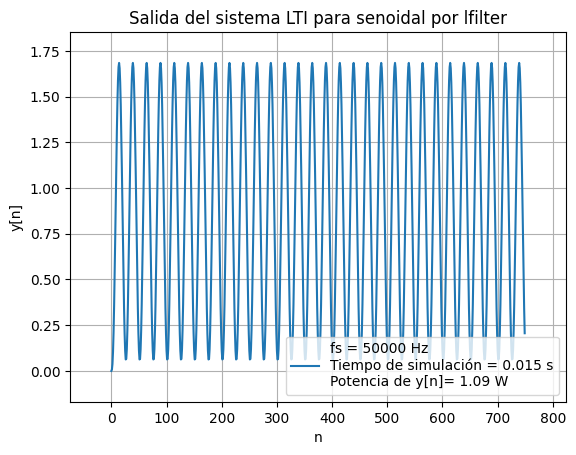

In [3]:
salida_a=ec_diferencias_coef(coef_x, coef_y, N, fs, xx_a,title="Salida del sistema LTI para senoidal")

- La señal de entrada disminuyó su amplitud y aumentó su offset, es decir, la componente continua que define su posición en el eje vertical, y, además, varían mínimamente sus ceros al desplazarse hacia la derecha, lo cual indica un leve cambio de fase.

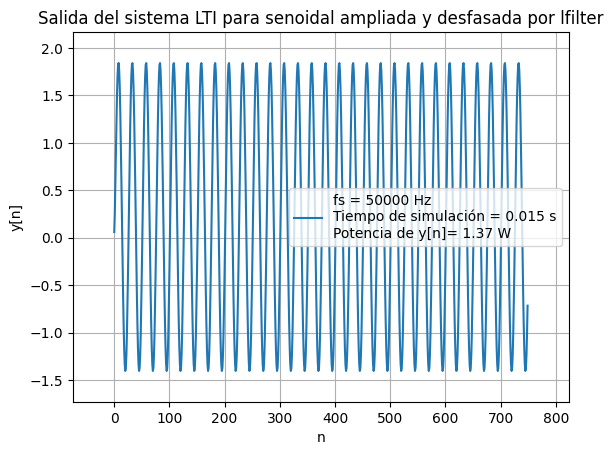

In [4]:
salida_b=ec_diferencias_coef(coef_x, coef_y, N, fs, xx_b,title="Salida del sistema LTI para senoidal ampliada y desfasada")

- Se evidencia un cambio de fase debido a la modificación de los extremos y ceros de la señal. También, se redujo la amplitud, que se constata al obtener una menor potencia, y, en este caso, no se alteró la componente continua.

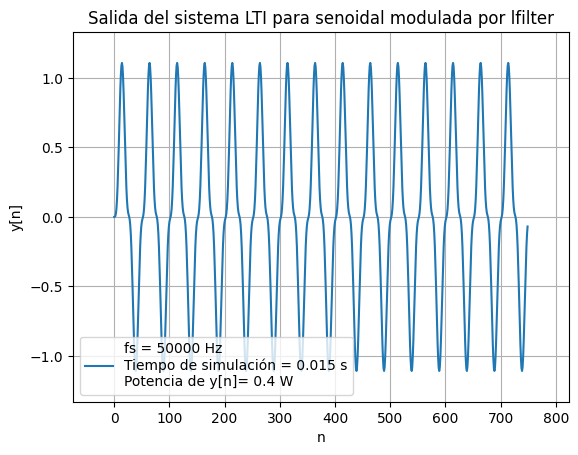

In [5]:
salida_c=ec_diferencias_coef(coef_x, coef_y, N, fs, xx_c,title="Salida del sistema LTI para senoidal modulada")

- La onda temporal incrementó su amplitud y, por lo tanto, su potencia. En adición, se distorsionan/suprimen ciertos extremos introducidos por la moduladora, lo cual implica un cambio de fase.

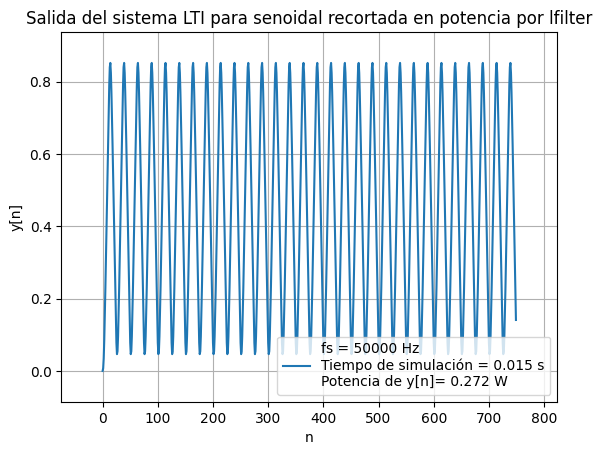

In [6]:
salida_d=ec_diferencias_coef(coef_x, coef_y, N, fs, xx_d,title="Salida del sistema LTI para senoidal recortada en potencia")

- Esta señal explicita las modificaciones a la entrada dado que la señal cambia su valor medio, reduce su potencia a pesar de incrementar su amplitud, y suaviza sus extremos los extremos abruptos/rectos.

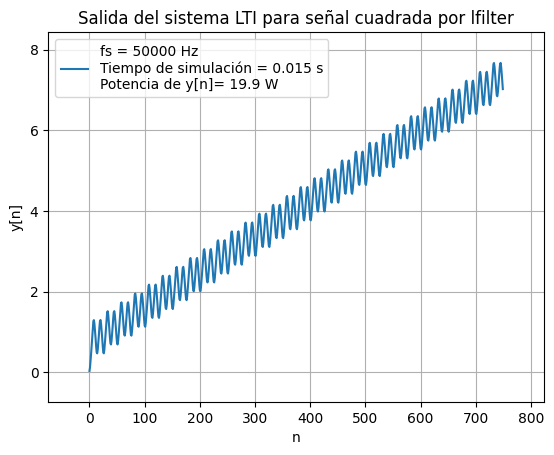

In [7]:
salida_e=ec_diferencias_coef(coef_x, coef_y, N, fs, xx_e,title="Salida del sistema LTI para señal cuadrada")

- La señal cuadrada de entrada es afectada en toda su forma como una combinación de senoidales crecientes en pendiente. A su vez, esta incrementa su potencia y amplitud drásticamente, y presenta un desfasaje que altera totalmente sus valores correspondientes a los ceros y extremos

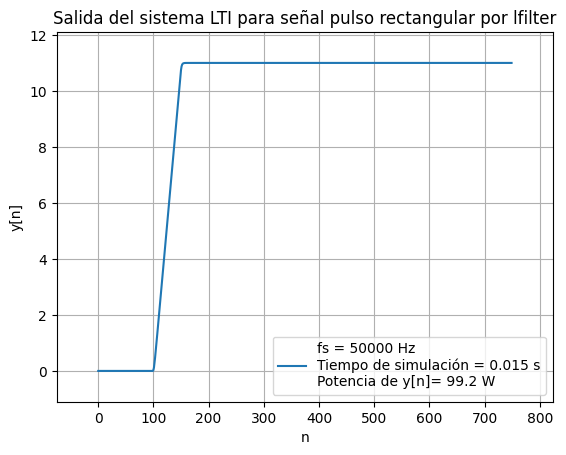

In [8]:
salida_f=ec_diferencias_coef(coef_x, coef_y, N, fs, xx_f,title="Salida del sistema LTI para señal pulso rectangular")

- En este caso, la salida inicialmente refleja la magnitud nula de la señal de entrada, luego posee una pendiente lineal creciente que representa el efecto del pulso, y finalmente permanece en un valor al deaparecer la entrada. Simultáneamente, se constata un aumento de la potencia y sus valores luego de activarse.

1.B  Inicialmente, se explicita la obtención de la respuesta al impulso ($ h[n] $) empleando la función lfilter con la señal de entrada impulso, $x[n] = δ[n]$, la cual es única para el sistema de ecuaciones en diferencias LTI porque depende de los coeficientes de esta y de la señal de entrada de tipo impulso, por ende, fue representada gráficamente una única vez. Posteriormente, al repetir la generación de las salidas para las mismas entradas del punto anterior mediante su convolución con la respuesta al impulso se obtuvieron salidas ($ y[n] $) equivalentes a pesar de haber utilizado otra función. Por su parte, el gráfico de la respuesta al impulso tiene sentido ya que, por ejemplo, inicia en 0.3 dado que $δ[n]$ es 1 en n=0 y las señales son causales, continúa creciendo paulatinamente dado que depende de los valores anteriores (régimen transitorio) y se estabiliza en un valor constante (régimen permanente).

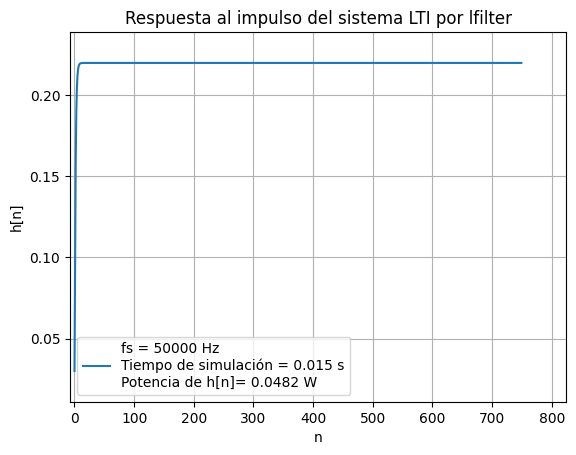

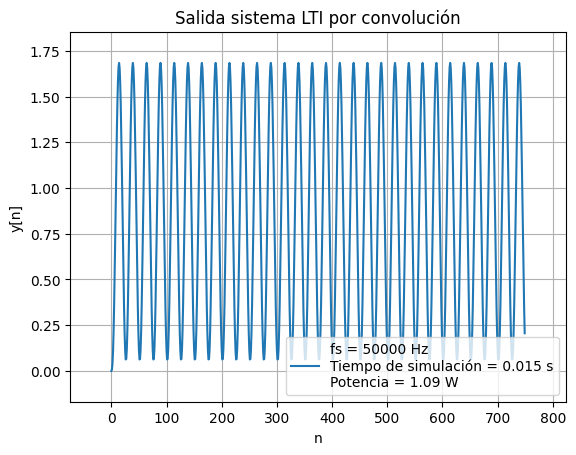

In [9]:
#%% Invocación de las funciones del punto 1B (y 1C implícito)
salida_impulso_a,h_impulso_a=salida_rta_impulso_conv(coef_x, coef_y, N, fs, xx_a,plot_y=True)

- 

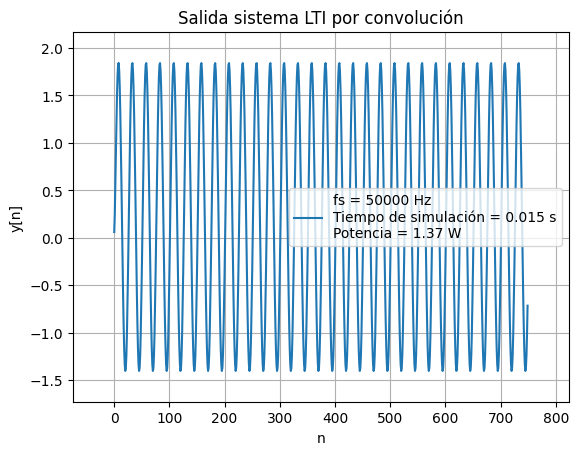

In [10]:
salida_impulso_b,h_impulso_b=salida_rta_impulso_conv(coef_x, coef_y, N, fs, xx_b,plot_y=True,plot_h=None)

- 

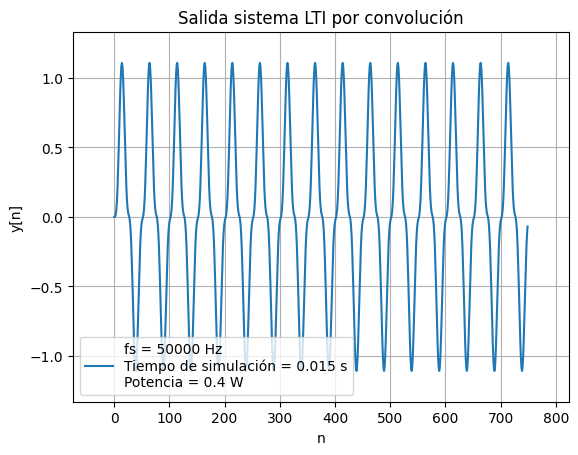

In [11]:
salida_impulso_c,h_impulso_c=salida_rta_impulso_conv(coef_x, coef_y, N, fs, xx_c,plot_y=True,plot_h=None)

- 

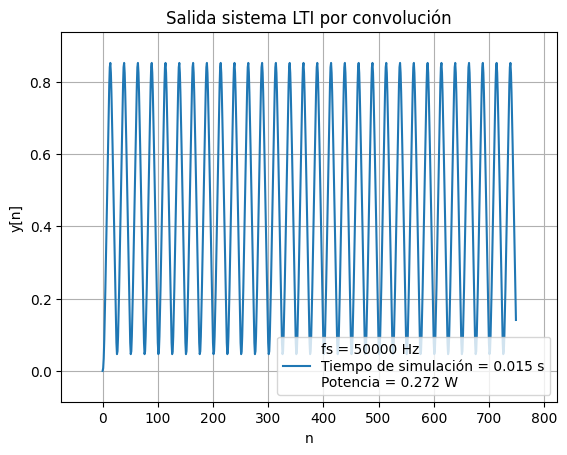

In [12]:
salida_impulso_d,h_impulso_d=salida_rta_impulso_conv(coef_x, coef_y, N, fs, xx_d,plot_y=True,plot_h=None)

- 

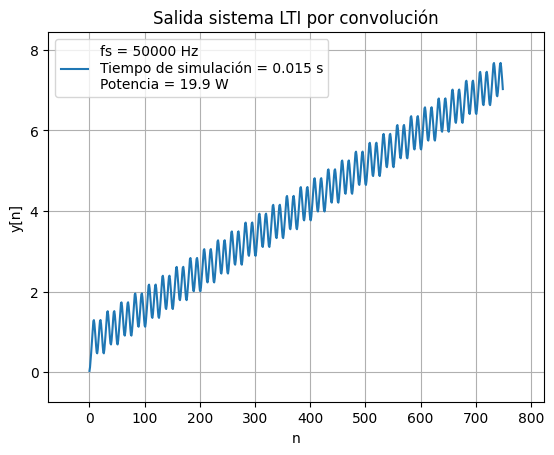

In [13]:
salida_impulso_e,h_impulso_e=salida_rta_impulso_conv(coef_x, coef_y, N, fs, xx_e,plot_y=True,plot_h=None)

- 

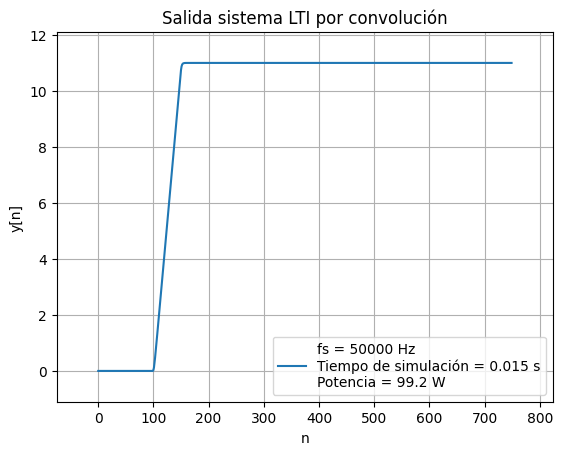

In [14]:
salida_impulso_f,h_impulso_f=salida_rta_impulso_conv(coef_x, coef_y, N, fs, xx_f,plot_y=True,plot_h=None)

- 

2.  I) Sistema no recursivo ya que solo depende de las entradas previas, por lo tanto, su respuesta al impulso es finita.

    II) Sistema recursivo debido a que depende de las ssalidas pasadas, en efecto, la respuesta al impulso es infinita.

In [15]:
#%% Invocación de las funciones del punto 2
tt_I,xx_2 = mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph=0, N=N_2,fs=fs_2, plot=None)
delta_aux=signal.unit_impulse(N_2)

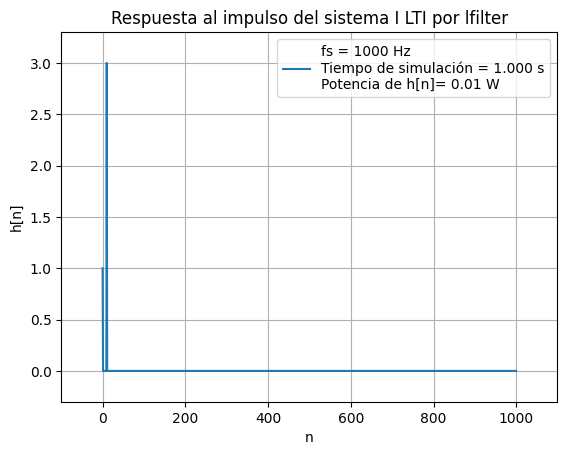

In [16]:
h_I=ec_diferencias_coef(coef_x_I,coef_y_I,N_2,fs_2,delta_aux,y_label="h",title="Respuesta al impulso del sistema I LTI")

- La respuesta al impulso $ h[n] $ es no nula cuando n=[0;10] ya que para otros casos no hay contribución del pulso.

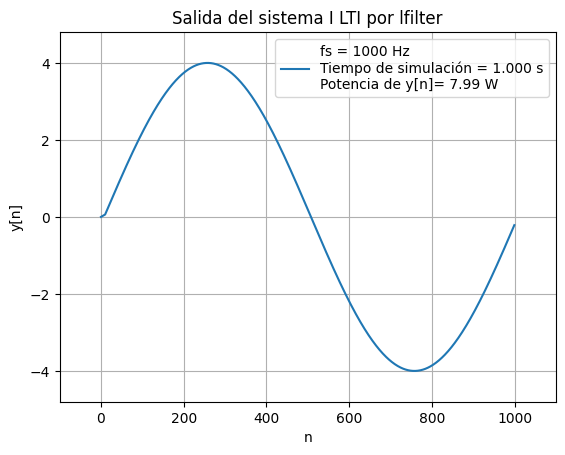

In [17]:
y_I=ec_diferencias_coef(coef_x_I,coef_y_I,N_2,fs_2,xx_2,title="Salida del sistema I LTI")

- La salida para la entrada senoidal es una suma entre ella y una copia desplazada 10 muestras temporales y escalada por 3, por ende, se incrementa la amplitud de 1 a 4 e inicialmente hay una alteración de los valores.

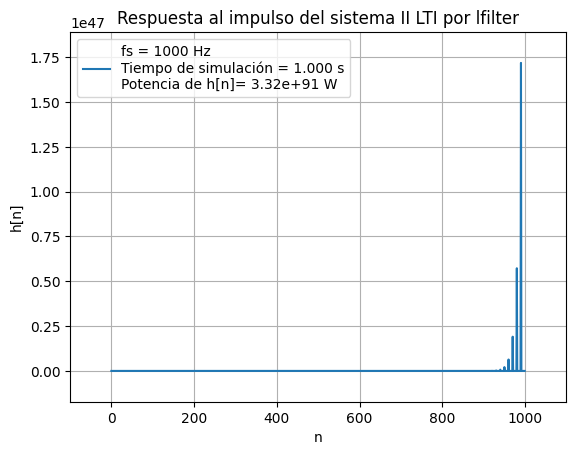

In [18]:
h_II=ec_diferencias_coef(coef_x_II,coef_y_II,N_2,fs_2,delta_aux,y_label="h",title="Respuesta al impulso del sistema II LTI")

- La respuesta al impulso $ h[n] $ es no nula cuando n=k*10, con k∈Z, debido a que los valores previos de la salida contribuyen de forma exponencial, lo cual se evidencia fundamentalmente para $900≤N≤1000$ con elevando orden de potencia. Además, las potencias de menor orden simulan una constante en cero, aunque esto no sea así, dado que el eje vertical está escalado en $e^{47}$.

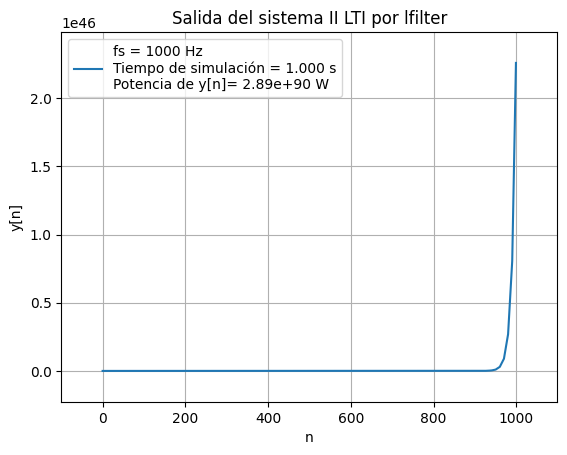

In [19]:
y_II=ec_diferencias_coef(coef_x_II,coef_y_II,N_2,fs_2,xx_2,title="Salida del sistema II LTI")

- La salida para la entrada senoidal, al igual que para la $h[n]$, consiste en un crecimiento exponencial escalado al orden $e^{46}$ dado que cada recursión se multiplica por 3 y se suma al valor de la entrada.

Bonus.

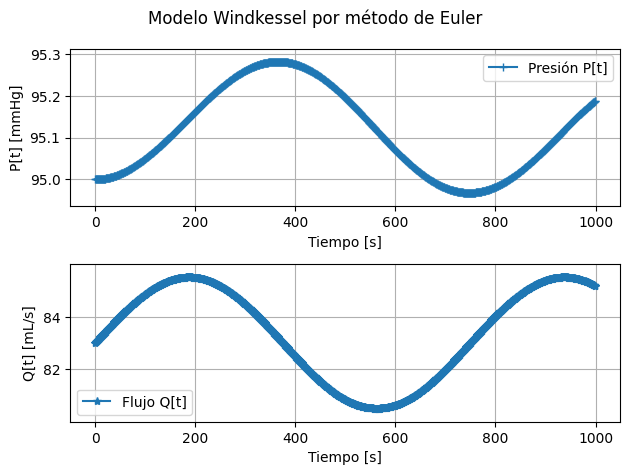

In [21]:
#%% Invocación de la función del Bonus (punto 3)
tt_q,xx_q = mi_funcion_sen(vmax = 2.5, dc = 83, ff = 1.333, ph=0, N=N_2,fs=fs_2,plot=None)
presion=euler(xx_q, N=N_2, fs=fs_2, R=R, C=C, P0=P0)

- De la discretización del modelo simulado a través de Euler y la consideración de los parámetros y constantes mencionados en el desarrollo experimental, resulta una P[n] con un valor medio aproximado de 95.15 mmHg que coincide con el producto de R y $Q_{dc}$, una amplitud de 0.15 mmHg y un desfase aproximado a 90° respecto al flujo (Q[n]). Además, la ecuación en diferencias obtenida presenta recursividad dado que depende del valor de las salidas pasadas, y el aporte de la entrada es insignificativo ya que corresponde a valores alrededor del 0 y 1.

# Conclusiones

Finalmente, se deduce de los experimentos desarrollados en el punto 1B que la respuesta al impulso de un sistema LTI descripto por ecuaciones en diferencias con entrada causal depende de la excitación generada por esta y los coeficientes que definen la relación entre la entrada y la salida.
Además, la obtención de la salida del sistema puede obtenerse mediante la convolución con la respuesta al impulso o a través de la resolución de la misma ecuación. 

En adición, la respuesta al impulso puede ser de carácter infinito si hay recursividad, es decir, depende de valores pasados de la salida, o finita, tal como se evidenció en los ítems del punto 2. En relación con la estabilidad, los sistemas no recursivos tienden a ella al converger de forma asintótica o marginal a cierto valor dada su independencia de las salidas pasadas. En cambio, los sistemas recursivos presentan respuestas inestables, que son de tipo crecientes en caso de que los coeficientes sean de magnitud mayor a uno.

También, en función de los resultados derivados de la consigna 1A se infiere que las entradas de forma senoidal son afectadas en menor medida sobre la amplitud, la fase y la media u offset en contraposición a señales de tipo cuadrada, modulada o pulso, las cuales son incididas en toda su forma a través de modificaciones significativas que se evidencian en la potencia y la disposición de los ceros y extremos.

Cabe destacar que la longitud (cantidad de coeficientes) de la respuesta al impulso fue determinada con el propósito de garantizar la exhibición tanto del régimen transitorio como el estacionario del sistema. De esta forma, los sistemas estables requieren pocos coeficientes para comprender su estabilidad, mientras que los sistemas inestables necesitan un amplio número de muestras para así representar su carácter.

# Autoevaluación
A) Resolví la tarea con seguridad.

B) Lo aprendido en esta tarea fue la capacidad de determinar las salidas y la respuesta al impulso de sistemas LTI definidos como ecuaciones en diferencias, y los efectos de la recursividad sobre la salida y la respuesta al impulso, concretamente sobre la amplitud, la fase y el offset.

C) No fue usada.